In [76]:
import csv
data_lists = {}
i = 0
with open('ExperimentRunner/src/experiment1_1.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        data_lists[i] = list(row)
        i=i+1

# print data_lists
timesteps = {}
events = {}
compartments = [{}]*((len(data_lists))/50-2)

s = {}
e = {}
i = {}
d = {}
r = {}
dr = {}
k = -1
c=0
for j in data_lists:
    if j%8==0:
        timesteps[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        k=k+1
    else:
        if j%8==1:
            events[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        else:
            compartments[c%len(compartments)][k] = list([int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!=''])
            print c%len(compartments), k, compartments[c%len(compartments)]
            c=c+1
            
print compartments[0]
        
max_time = 0
for j in timesteps:
    local_max = max(timesteps[j])
    if local_max>max_time:
        max_time = local_max

for j in timesteps:
    index = 0
    local_s = [0]*(max_time+1)
    local_e = [0]*(max_time+1)
    local_i = [0]*(max_time+1)
    local_d = [0]*(max_time+1)
    local_r = [0]*(max_time+1)
    local_dr = [0]*(max_time+1)
    last_value_s = s[j][0]
    last_value_e = e[j][0]
    last_value_i = i[j][0]
    last_value_d = d[j][0]
    last_value_r = r[j][0]
    last_value_dr = dr[j][0]
    for m in range(0, max_time+1):
        if index<len(timesteps[j]) and timesteps[j][index]==m:
            local_s[m] = s[j][index]
            last_value_s = s[j][index]
            local_e[m] = e[j][index]
            last_value_e = e[j][index]
            local_i[m] = i[j][index]
            last_value_i = i[j][index]
            local_d[m] = d[j][index]
            last_value_d = d[j][index]
            local_r[m] = r[j][index]
            last_value_r = r[j][index]
            local_dr[m] = dr[j][index]
            last_value_dr = dr[j][index]
            index=index+1
        else:
            local_s[m] = last_value_s
            local_e[m] = last_value_e
            local_i[m] = last_value_i
            local_d[m] = last_value_d
            local_r[m] = last_value_r
            local_dr[m] = last_value_dr
    s[j] = local_s
    e[j] = local_e
    i[j] = local_i
    d[j] = local_d
    r[j] = local_r
    dr[j] = local_dr
    


0 0 {0: [4976, 4964, 4943, 4913, 4876, 4846, 4803, 4746, 4655, 4529, 4338, 4102, 3867, 3503, 3082, 2696, 2331, 1921, 1451, 1077, 780, 493, 345, 225, 143, 99, 54, 31, 19, 12, 8, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
1 0 {0: [15, 21, 41, 66, 93, 114, 142, 178, 244, 338, 469, 652, 811, 1088, 1371, 1606, 1795, 2036, 2296, 2428, 2521, 2558, 2479, 2377, 2256, 2131, 1994, 1850, 1711, 1560, 1434, 1305, 1210, 1107, 1012, 938, 872, 800, 741, 679, 618, 554, 509, 459, 436, 408, 372, 331, 304, 282, 258, 235, 214, 198, 177, 159, 141, 131, 124, 115, 106, 94, 89, 80, 72, 69, 61, 56, 51, 45, 40, 36, 33, 33, 32, 29, 29, 22, 19, 18, 16, 15, 13, 13, 13, 13, 13, 11, 11, 11, 10, 8, 8, 8, 8, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3,

KeyError: 0

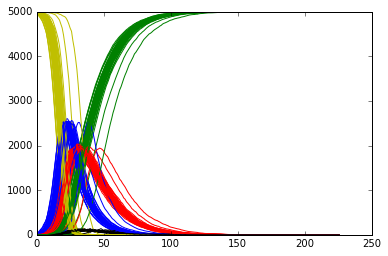

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
for j in s:
    plt.plot(range(0,max_time+1), s[j], 'y-')
    plt.plot(range(0,max_time+1), e[j], 'b-')
    plt.plot(range(0,max_time+1), i[j], 'r-')
    plt.plot(range(0,max_time+1), d[j], 'k-')
    plt.plot(range(0,max_time+1), [x + y for x, y in zip(r[j], dr[j])], 'g-')

In [50]:
s_average = [0]*(max_time+1)
num_of_experiments = len(s)
for i in range(0, max_time+1):
    local_sum_s = 0
    for j in s:
        local_sum_s=local_sum_s+s[j][i]
    s_average[i]=(local_sum_s+0.0)/num_of_experiments
print s_average

[4984.1, 4972.04, 4956.86, 4939.26, 4918.88, 4892.52, 4855.38, 4809.24, 4746.62, 4663.52, 4557.4, 4421.92, 4253.1, 4044.5, 3792.04, 3497.16, 3174.22, 2808.82, 2421.0, 2036.32, 1672.76, 1335.82, 1044.9, 806.78, 611.44, 460.54, 343.86, 262.88, 202.78, 158.94, 127.4, 101.26, 81.52, 66.14, 54.08, 42.62, 32.24, 24.22, 17.18, 11.88, 7.9, 5.32, 3.12, 2.06, 1.4, 0.92, 0.42, 0.32, 0.2, 0.2, 0.14, 0.14, 0.1, 0.08, 0.08, 0.06, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

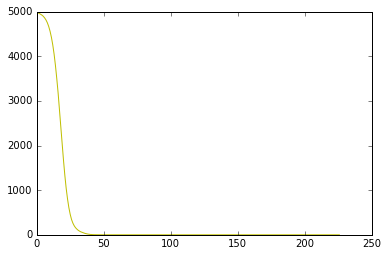

In [51]:
plt.plot(range(0,max_time+1), s_average, 'y-')